In [1]:
#Gerekli kütüphaneleri import edilmesi 
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
#csv dosyasını okuyalım
df = pd.read_csv("/content/NetflixOriginals.csv", encoding="ISO-8859-1")
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [13]:
#Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
df[df["Runtime"]>=90]["Language"].value_counts()


English                       264
Hindi                          33
Spanish                        22
French                         13
Italian                        12
Portuguese                      9
Indonesian                      8
Turkish                         5
Korean                          5
German                          5
Japanese                        4
Marathi                         3
Polish                          3
Dutch                           3
Filipino                        2
Thai                            1
Malay                           1
English/Japanese                1
Spanish/Catalan                 1
English/Taiwanese/Mandarin      1
Khmer/English/French            1
Tamil                           1
Spanish/English                 1
English/Korean                  1
English/Arabic                  1
English/Russian                 1
English/Akan                    1
English/Ukranian/Russian        1
Name: Language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


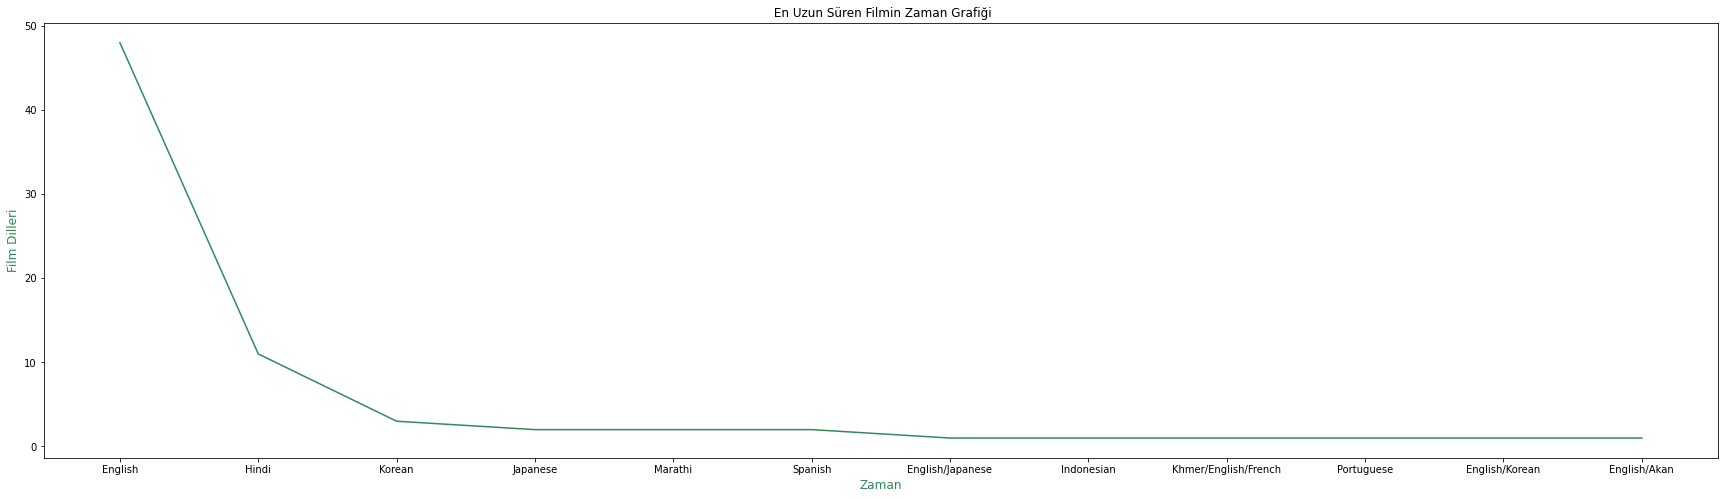

In [20]:
fig, ax = plt.subplots(figsize=(30,8))
sns.lineplot(df[df["Runtime"]>=120]["Language"].value_counts().index,    
        df[df["Runtime"]>=120]["Language"].value_counts().values,
        color= "seagreen")

plt.title(" En Uzun Süren Filmin Zaman Grafiği",fontsize=12)
plt.xlabel("Zaman",fontsize=12,color= "seagreen")
plt.ylabel("Film Dilleri",fontsize=12,color= "seagreen")
plt.show()

In [39]:
print("Hintli film ortalama uzunluğu : {} ".format(df[df["Language"] == "Hindi"]["Runtime"].mean()))

Hintli film ortalama uzunluğu : 115.78787878787878 


In [40]:
#'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
df["Genre"].value_counts().count()

115

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


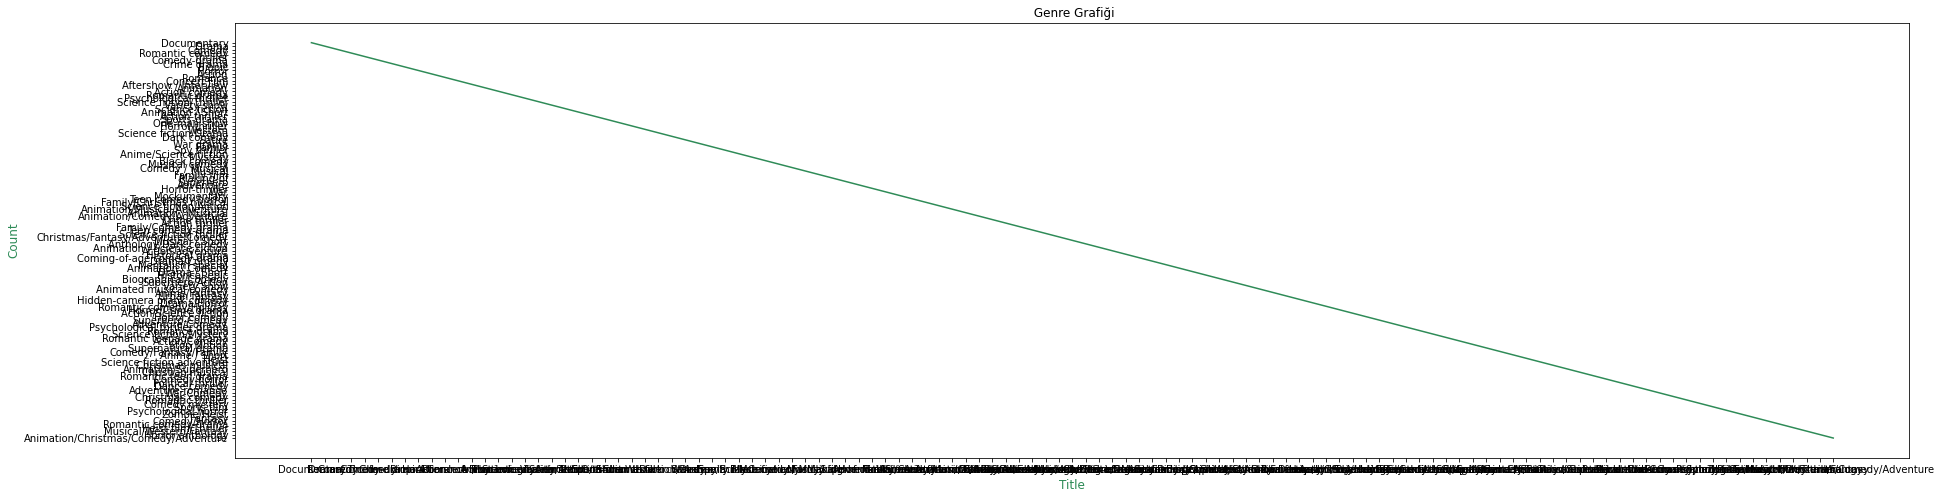

In [43]:
dataGenre = pd.DataFrame(columns = ["Title" , 'Count'])
dataGenre["Title"] = df["Genre"].value_counts().index
dataGenre["Count"] = df["Genre"].value_counts().index

fig, ax = plt.subplots(figsize=(30,8))
sns.lineplot(dataGenre["Title"],dataGenre["Count"],
        color= "seagreen")

plt.title(" Genre Grafiği",fontsize=12)
plt.xlabel("Title",fontsize=12,color= "seagreen")
plt.ylabel("Count",fontsize=12,color= "seagreen")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


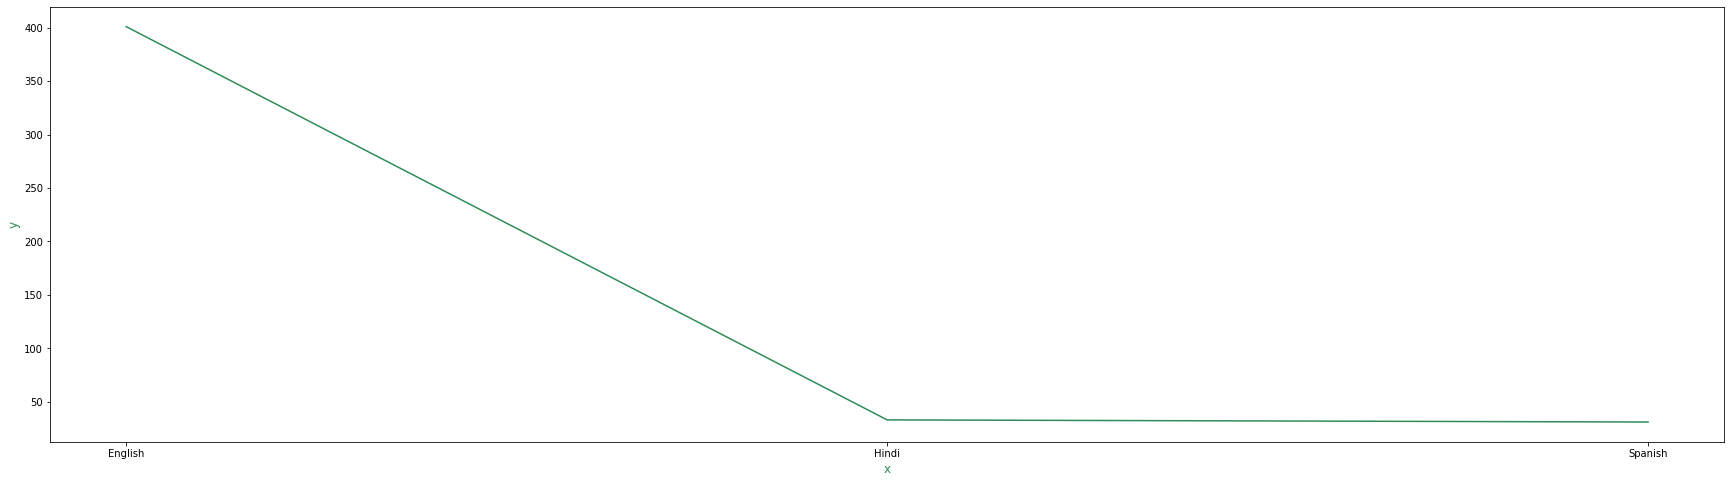

In [47]:
#Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
df.Language.unique() #filmleri en çok kullanılan dillere göre listele
df.Language.value_counts() #sayısını tut
en_yuksek = df.Language.value_counts().nlargest(3) #en fazla 3 ü al 
en_yuksek

fig, ax = plt.subplots(figsize=(30,8))
sns.lineplot(en_yuksek.index,en_yuksek.values,
        color= "seagreen")


plt.xlabel("x",fontsize=12,color= "seagreen")
plt.ylabel("y",fontsize=12,color= "seagreen")
plt.show()



In [49]:
#IMDB puanı en yüksek olan ilk 10 film hangileridir?
dataIMBD = df.nlargest(n=10, columns=['IMDB Score']).iloc[:,[0,1,4]]
dataIMBD

fig = px.scatter(data_frame=df, x="IMDB Score", y="Runtime")
fig.update_layout(autosize=False, width=800, height=600,)

fig.show()

In [50]:
#IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir. Görselleştiriniz.
dfIMDBGenre = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
dfIMDBGenre

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



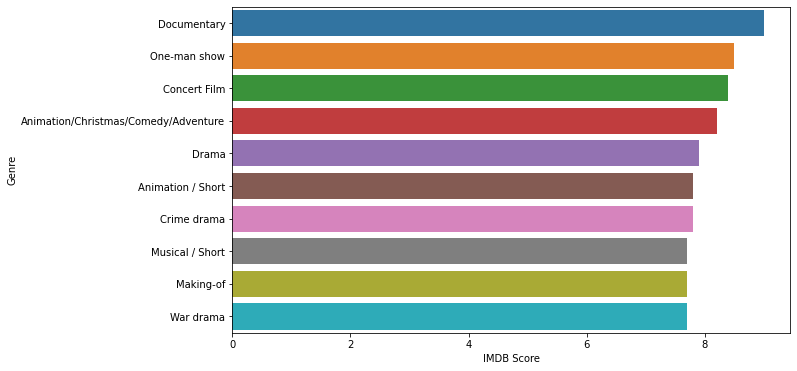

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(dfIMDBGenre["IMDB Score"],
            dfIMDBGenre["Genre"],
            ax=ax)
plt.show();

In [56]:
#'Runtime' değeri en yüksek olan ilk 10 film hangisidir?

dfRate = df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["Runtime"], ascending=False)[:10]
dfRate

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



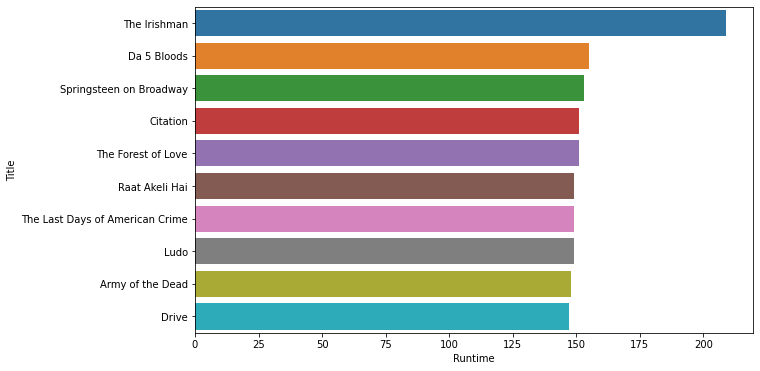

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(dfRate["Runtime"],
            dfRate["Title"],
            ax=ax);
plt.show()

In [70]:
#Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
dusukRate = df[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=True)[:10]
dusukRate
dusukRate = df.groupby("Language")["IMDB Score"].mean().nsmallest(15)
dusukRate

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Turkish             5.660000
French              5.770000
Dutch               5.800000
Indonesian          5.844444
Korean              5.916667
Name: IMDB Score, dtype: float64

In [73]:
fig = px.bar(dusukRate, x=dusukRate.index, y=dusukRate.values)
fig.show()

In [77]:
#Her bir dilin en fazla kullanıldığı "Genre" nedir?
Language = df.groupby(["Language"])["Genre"].value_counts().groupby(level=0, group_keys=False).head(1)
Language

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar